In [1]:
# libraries needed
library(readr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# READING FILES
# please change reading path accordingly

# read the main title table (reduced and cleaned)
title_basics <- read_csv("data/small_title_basics.csv")
head(title_basics)

Rows: 333760 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): tconst, titleType, primaryTitle, originalTitle, genres
dbl (3): isAdult, startYear, runtimeMinutes
lgl (1): endYear

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>
tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,NA,NA,"Action,Crime"
tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NA,118,"Comedy,Fantasy,Romance"
tt0062336,movie,The Tango of the Widower and Its Distorting Mirror,El tango del viudo y su espejo deformante,0,2020,NA,70,Drama
tt0067758,movie,"Simón, contamos contigo","Simón, contamos contigo",0,2015,NA,81,"Comedy,Drama"
tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NA,122,Drama
tt0070596,movie,Socialist Realism,El realismo socialista,0,2023,NA,78,Drama


In [3]:
# read the ratings table
title_ratings <- read_tsv("data/title.ratings.tsv")
head(title_ratings)

Rows: 1501791 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): tconst
dbl (2): averageRating, numVotes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tconst,averageRating,numVotes
<chr>,<dbl>,<dbl>
tt0000001,5.7,2102
tt0000002,5.6,282
tt0000003,6.5,2121
tt0000004,5.4,182
tt0000005,6.2,2852
tt0000006,5.0,200


In [4]:
# read the principals table (containing data about actors, reduced and cleaned version)
title_principals <- read_csv("data/small_title_principals.csv")
head(title_principals)

Rows: 6220928 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): tconst, nconst, category, primaryName
dbl (2): ordering, birthYear

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


tconst,ordering,nconst,category,primaryName,birthYear
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
tt0000005,1,nm0443482,actor,Charles Kayser,1878
tt0000007,1,nm0179163,actor,James J. Corbett,1866
tt0000008,1,nm0653028,actor,NA,NA
tt0000009,1,nm0063086,actress,Blanche Bayliss,1878
tt0000011,1,nm3692297,actor,NA,NA
tt0000014,1,nm0166380,actor,François Clerc,NA


In [5]:
# PROCESSING OBJECTS

# add ratings to title_basics (join the tables)
title_basics_ratings <- left_join(title_basics, title_ratings, by = "tconst")
head(title_basics_ratings)

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>
tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,NA,NA,"Action,Crime",NA,NA
tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NA,118,"Comedy,Fantasy,Romance",6.4,90594
tt0062336,movie,The Tango of the Widower and Its Distorting Mirror,El tango del viudo y su espejo deformante,0,2020,NA,70,Drama,6.5,194
tt0067758,movie,"Simón, contamos contigo","Simón, contamos contigo",0,2015,NA,81,"Comedy,Drama",4.2,47
tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NA,122,Drama,6.7,8186
tt0070596,movie,Socialist Realism,El realismo socialista,0,2023,NA,78,Drama,7.4,74


In [6]:
# keep only shorter movies with at least 10 votes
df_movies <- filter(title_basics_ratings, runtimeMinutes < 180, numVotes >= 10)
dim(df_movies)
head(df_movies)

[1] 152959     11

tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<dbl>
tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NA,118,"Comedy,Fantasy,Romance",6.4,90594
tt0062336,movie,The Tango of the Widower and Its Distorting Mirror,El tango del viudo y su espejo deformante,0,2020,NA,70,Drama,6.5,194
tt0067758,movie,"Simón, contamos contigo","Simón, contamos contigo",0,2015,NA,81,"Comedy,Drama",4.2,47
tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NA,122,Drama,6.7,8186
tt0070596,movie,Socialist Realism,El realismo socialista,0,2023,NA,78,Drama,7.4,74
tt0082328,movie,Embodiment of Evil,Encarnação do Demônio,0,2008,NA,94,Horror,5.9,1840


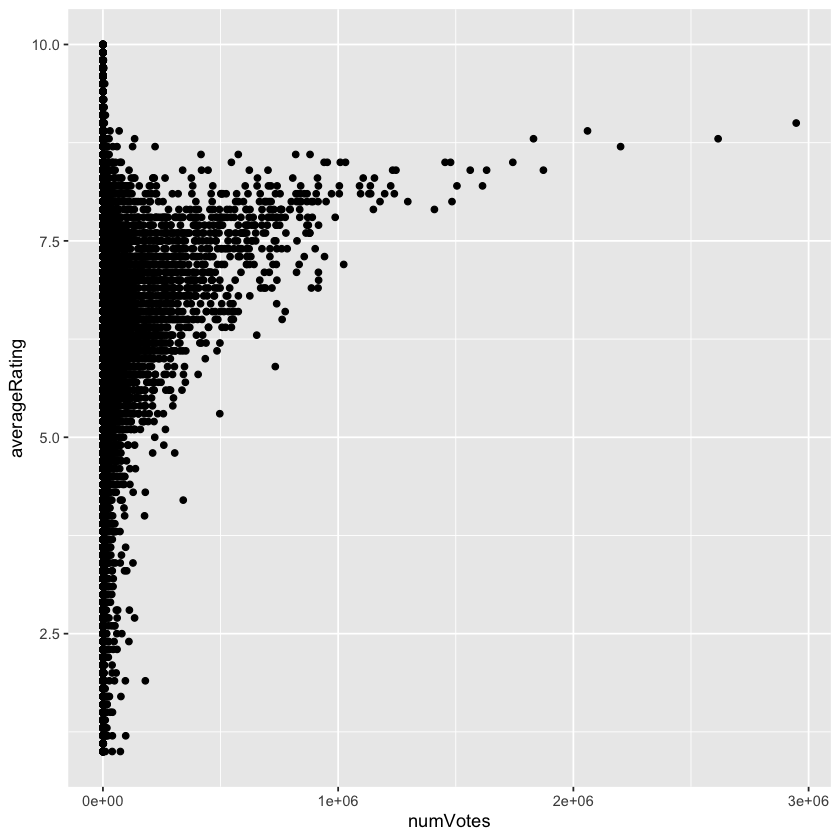

In [7]:
# PLOTTING FILES
# Let's see the ratings vs number of votes distribution
ggplot(df_movies, aes(x = numVotes, y = averageRating)) +
  geom_point()

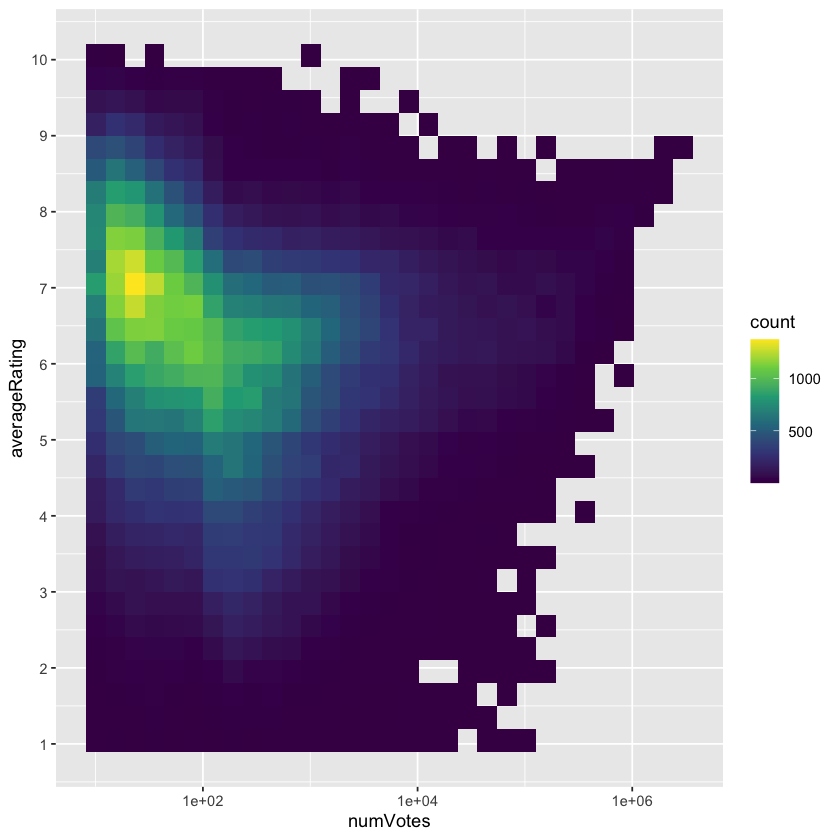

In [8]:
# it's better to look at it with a heatmap on log10 scale
ggplot(df_movies, aes(x = numVotes, y = averageRating)) +
  geom_bin2d() +
  scale_x_log10() +
  scale_y_continuous(breaks = 1:10) +
  scale_fill_viridis_c()

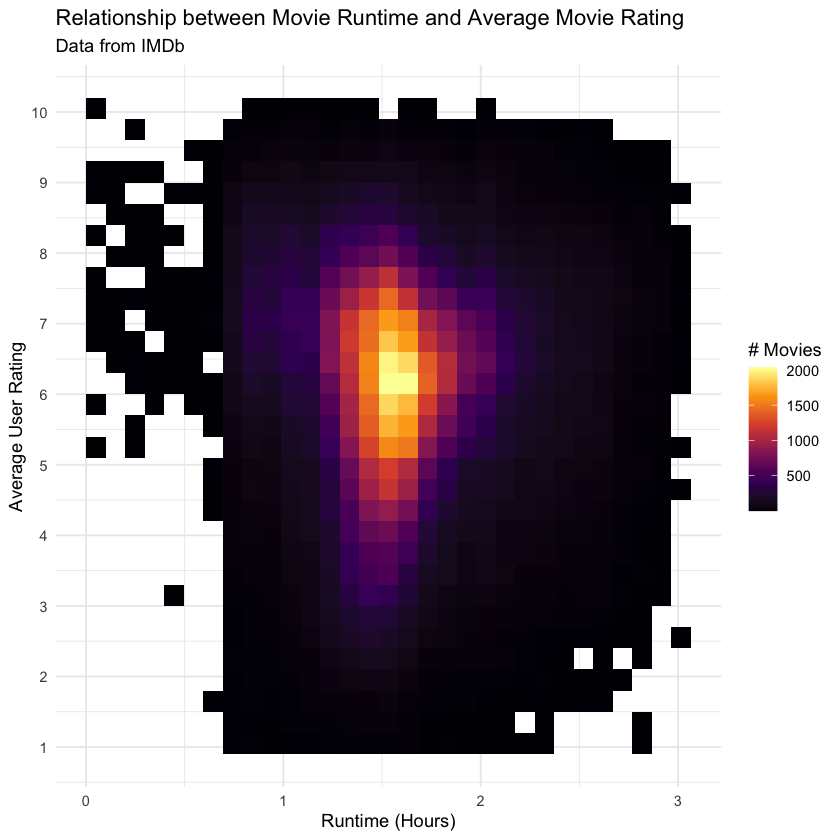

In [9]:
# what about the rating as a function of lenght of the movie?
ggplot(df_movies, aes(x = runtimeMinutes, y = averageRating)) +
  geom_bin2d() +
  scale_x_continuous(breaks = seq(0, 180, 60), labels = 0:3) +
  scale_y_continuous(breaks = 0:10) +
  scale_fill_viridis_c(option = "inferno") +
  theme_minimal() +
  labs(title = "Relationship between Movie Runtime and Average Movie Rating",
       subtitle = "Data from IMDb",
       x = "Runtime (Hours)",
       y = "Average User Rating",
       fill = "# Movies")